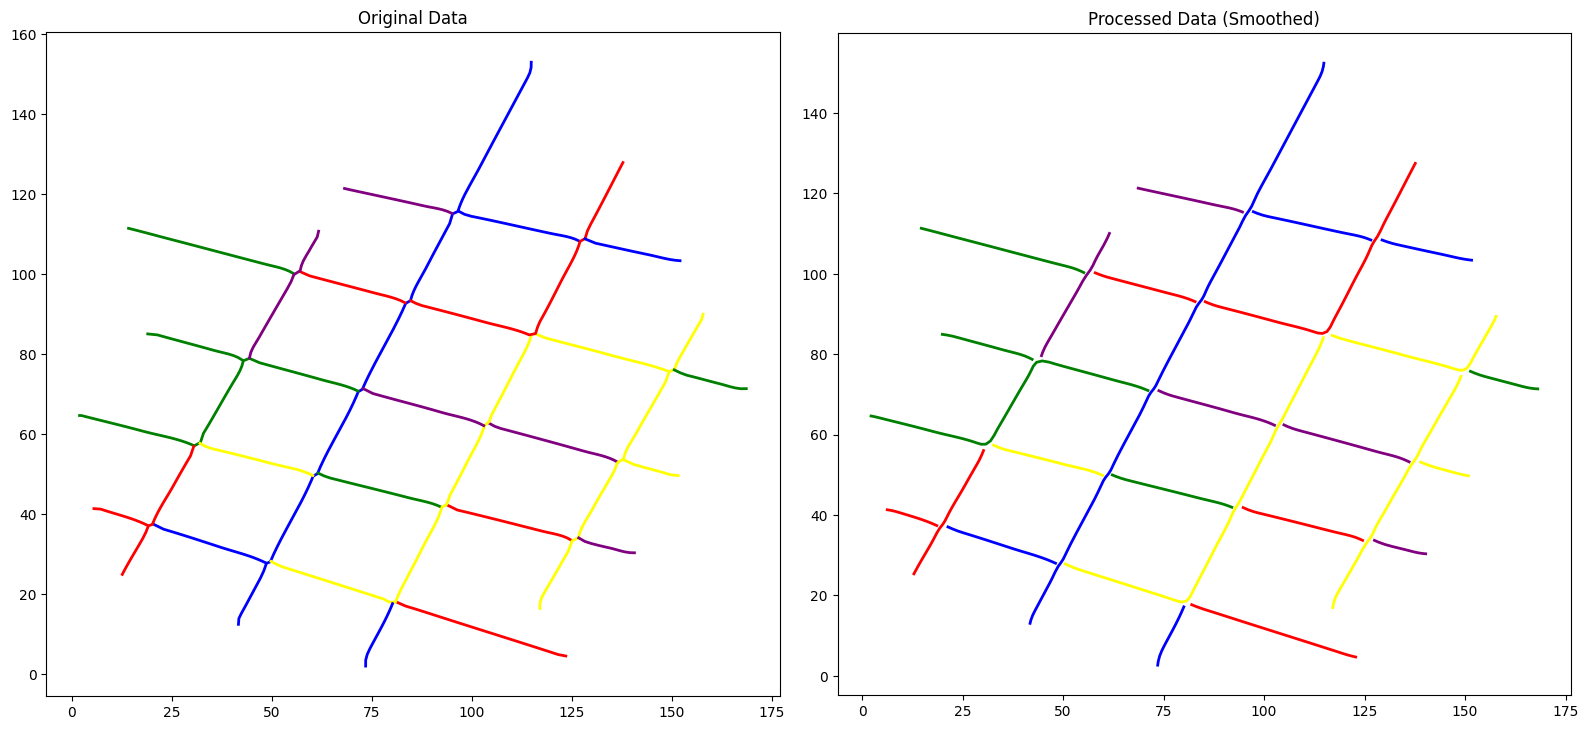

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

def read_csv_(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def process_shape(XY, sigma=1):
    # Apply Gaussian smoothing to the X and Y coordinates separately
    smoothed_X = gaussian_filter1d(XY[:, 0], sigma)
    smoothed_Y = gaussian_filter1d(XY[:, 1], sigma)
    return np.column_stack((smoothed_X, smoothed_Y))

def plot(paths_XYs, title, ax):
    colours = ['red', 'green', 'blue', 'yellow', 'purple']  # Define some colors for plotting
    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
    ax.set_aspect('equal')
    ax.set_title(title)

def process_and_visualize_doodle(csv_file):
    fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(16, 8))

    output_data = read_csv_(csv_file)

    # Original data plot
    plot(output_data, 'Original Data', axs[0])

    # Processed data plot
    processed_data = []
    for XYs in output_data:
        processed_XYs = [process_shape(XY) for XY in XYs]
        processed_data.append(processed_XYs)

    plot(processed_data, 'Processed Data (Smoothed)', axs[1])

    plt.show()

# Specify the file path to your CSV file
csv_file = "/content/frag2.csv"

# Process and visualize the doodle
process_and_visualize_doodle(csv_file)
